<a href="https://colab.research.google.com/github/Atul-cyber2004/NICSI-PROJ-1/blob/main/internship_road_accidents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Atul_df.csv to Atul_df.csv



Top 5 States with Most Road Accident Deaths


,State,Total Number of People Killed
0,Uttar Pradesh,21047
1,Tamil Nadu,13920
2,Maharashtra,13081
3,Madhya Pradesh,11200
4,Karnataka,10741



Top 5 States with Highest Road Density


,State,Total Roads (km)
0,Maharashtra,508467.168590
1,Karnataka,304361.382564
2,Uttar Pradesh,304286.162564
3,Assam,293954.257846
4,West Bengal,269821.190513


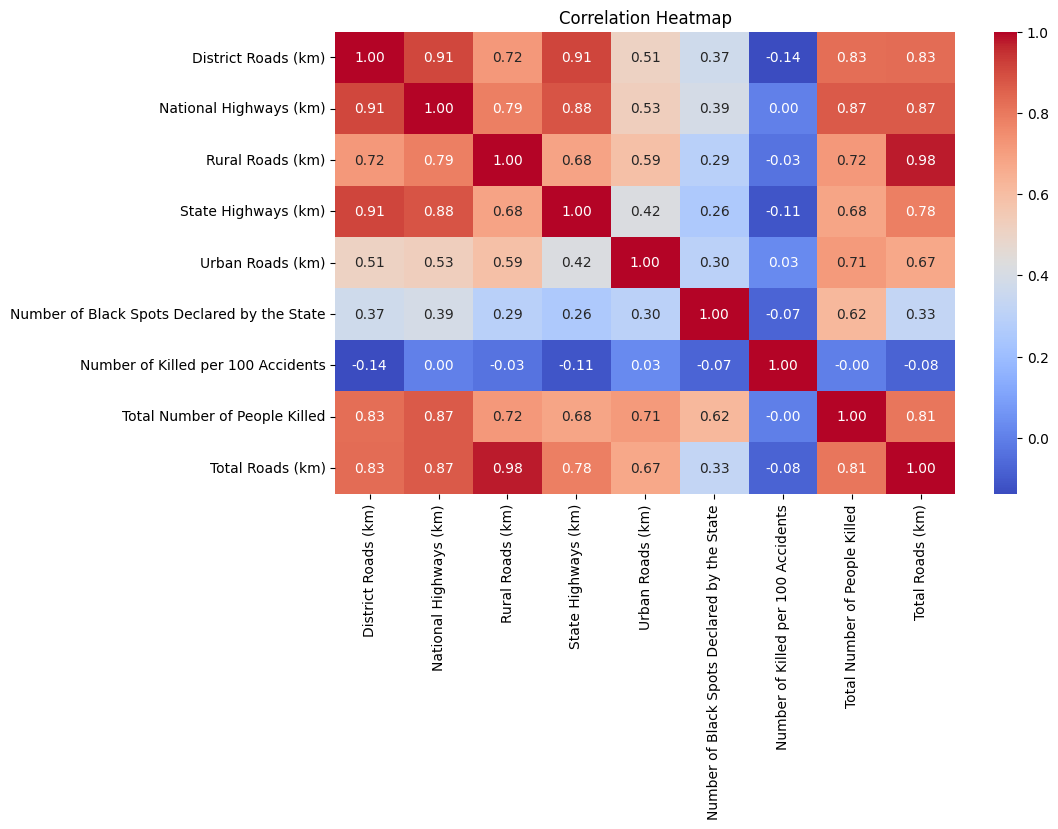


KEY INSIGHTS FROM ROAD ACCIDENT DATA

• Uttar Pradesh has the highest number of road accident deaths: 21046
• Maharashtra has the highest total road length: 508467 km
• Tamil Nadu has the highest number of black spots: 748
• The Dadra And Nagar Haveli And Daman And Diu has the highest deaths per 100 accidents: 101.75

OBSERVATIONS:
• There is a moderate correlation between road length and total deaths.
• States with more black spots tend to report higher fatalities.
• Rural and urban road imbalance may influence accident severity.


In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from IPython.display import display


df = pd.read_csv('Atul_df.csv')


df['Total Roads (km)'] = df['District Roads (km)'] + df['National Highways (km)'] + \
                         df['Rural Roads (km)'] + df['State Highways (km)'] + df['Urban Roads (km)']


df['Number of Black Spots Declared by the State'] = df['Number of Black Spots Declared by the State'].fillna(0)


print("\nTop 5 States with Most Road Accident Deaths")
top_deaths = df.sort_values(by='Total Number of People Killed', ascending=False)[['State', 'Total Number of People Killed']].head()
top_deaths['Total Number of People Killed'] = top_deaths['Total Number of People Killed'].round(0).astype(int)
display(top_deaths.reset_index(drop=True))

print("\nTop 5 States with Highest Road Density")
top_roads = df.sort_values(by='Total Roads (km)', ascending=False)[['State', 'Total Roads (km)']].head()
display(top_roads.reset_index(drop=True))


total_roads = {
    'District Roads': df['District Roads (km)'].sum(),
    'National Highways': df['National Highways (km)'].sum(),
    'Rural Roads': df['Rural Roads (km)'].sum(),
    'State Highways': df['State Highways (km)'].sum(),
    'Urban Roads': df['Urban Roads (km)'].sum()
}
fig = px.pie(values=total_roads.values(), names=total_roads.keys(), title='National Road Composition by Type')
fig.show()


fig = px.bar(df.sort_values(by='Total Number of People Killed', ascending=False),
             x='Total Number of People Killed', y='State', orientation='h',
             title='Total Deaths by State', color='Total Number of People Killed',
             color_continuous_scale='Reds')
fig.show()


fig = px.bar(df.sort_values(by='Total Roads (km)', ascending=False),
             x='Total Roads (km)', y='State', orientation='h',
             title='Total Road Length by State', color='Total Roads (km)',
             color_continuous_scale='Blues')
fig.show()


fig = px.scatter(df, x='Total Roads (km)', y='Total Number of People Killed',
                 hover_name='State', size='Number of Black Spots Declared by the State',
                 title='Road Length vs Total Deaths (Bubble = Number of Black Spots)',
                 color='Number of Killed per 100 Accidents',
                 color_continuous_scale='Viridis')
fig.show()


plt.figure(figsize=(10, 6))
sns.heatmap(df.drop(columns=['State']).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


print("\nKEY INSIGHTS FROM ROAD ACCIDENT DATA\n")

most_deaths = df.loc[df['Total Number of People Killed'].idxmax()]
most_roads = df.loc[df['Total Roads (km)'].idxmax()]
most_blackspots = df.loc[df['Number of Black Spots Declared by the State'].idxmax()]
highest_killed_per_100 = df.loc[df['Number of Killed per 100 Accidents'].idxmax()]

print(f"• {most_deaths['State']} has the highest number of road accident deaths: {int(most_deaths['Total Number of People Killed'])}")
print(f"• {most_roads['State']} has the highest total road length: {int(most_roads['Total Roads (km)'])} km")
print(f"• {most_blackspots['State']} has the highest number of black spots: {int(most_blackspots['Number of Black Spots Declared by the State'])}")
print(f"• {highest_killed_per_100['State']} has the highest deaths per 100 accidents: {highest_killed_per_100['Number of Killed per 100 Accidents']}")

print("\nOBSERVATIONS:")
print("• There is a moderate correlation between road length and total deaths.")
print("• States with more black spots tend to report higher fatalities.")
print("• Rural and urban road imbalance may influence accident severity.")


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving RA2019_A2.csv to RA2019_A2.csv


<ipython-input-14-560a39a36652>:45: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[numeric_cols] = df[numeric_cols].fillna(method='ffill', axis=1).fillna(method='bfill', axis=1)
<ipython-input-14-560a39a36652>:45: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[numeric_cols] = df[numeric_cols].fillna(method='ffill', axis=1).fillna(method='bfill', axis=1)


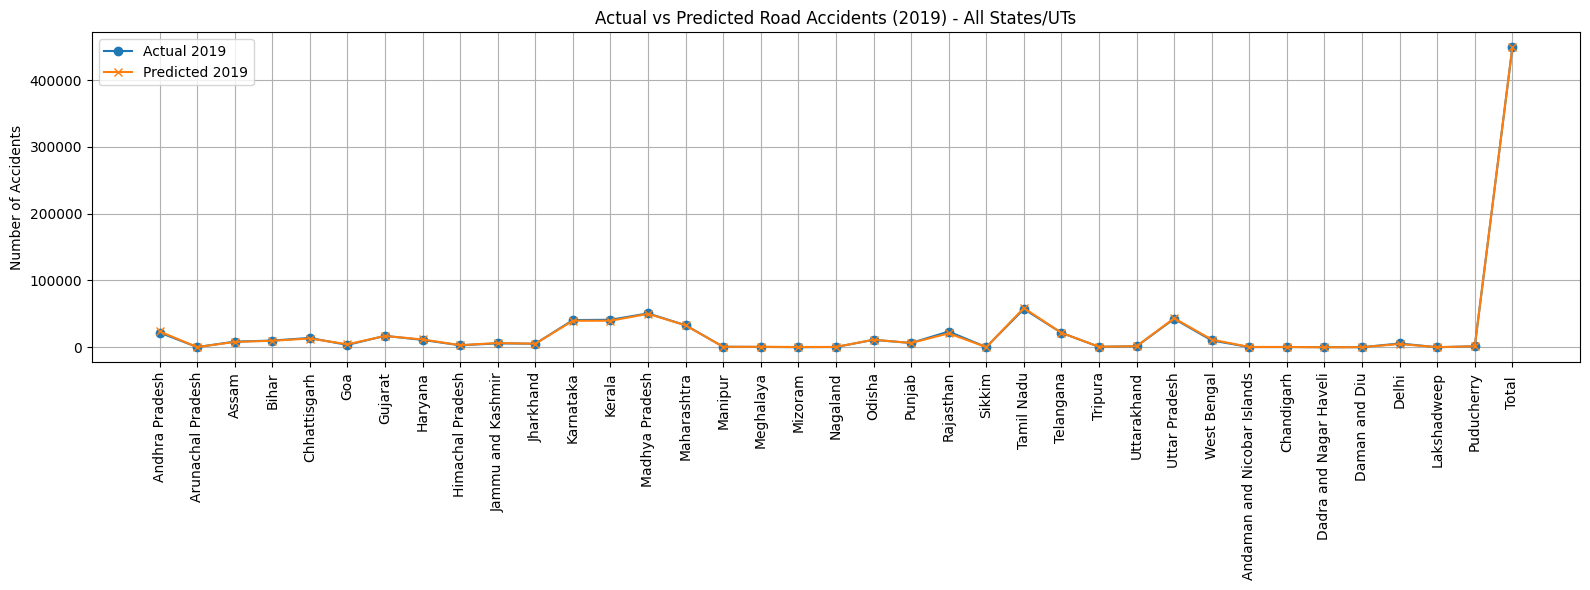

RMSE: 672.54
 R² Score: 1.00


In [ ]:

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("RA2019_A2.csv")

# Rename columns for easier access
df = df.rename(columns={
    "States/UTs": "State",
    "State/UT-Wise Total Number of Road Accidents during 2016": "2016",
    "State/UT-Wise Total Number of Road Accidents during 2017": "2017",
    "State/UT-Wise Total Number of Road Accidents during 2018": "2018",
    "State/UT-Wise Total Number of Road Accidents during 2019 - Numbers": "2019",
    "Total Number of Accidents Per Lakh Population - 2016": "Rate_Lakh_2016",
    "Total Number of Accidents Per Lakh Population - 2017": "Rate_Lakh_2017",
    "Total Number of Accidents Per Lakh Population - 2018": "Rate_Lakh_2018",
    "Total Number of  Road Accidents per 10,000 Vehicles - 2016": "Rate_Vehicles_2016",
    "Total Number of  Road Accidents per 10,000 Vehicles - 2017": "Rate_Vehicles_2017",
    "Total Number of  Road Accidents per 10,000 Vehicles - 2018": "Rate_Vehicles_2018",
    "Total Number of  Road Accidents per 10,000 Km of Roads - 2016": "Rate_Roads_2016",
    "Total Number of  Road Accidents per 10,000 Km of Roads - 2017": "Rate_Roads_2017",
    "Total Number of  Road Accidents per 10,000 Km of Roads - 2018(P)": "Rate_Roads_2018"
})

# Columns to clean
numeric_cols = [
    "2016", "2017", "2018", "2019",
    "Rate_Lakh_2016", "Rate_Lakh_2017", "Rate_Lakh_2018",
    "Rate_Vehicles_2016", "Rate_Vehicles_2017", "Rate_Vehicles_2018",
    "Rate_Roads_2016", "Rate_Roads_2017", "Rate_Roads_2018"
]

# Clean and convert to numeric
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', '').str.strip(), errors='coerce')

# Interpolate missing values in numeric columns (row-wise)
df[numeric_cols] = df[numeric_cols].interpolate(axis=1, limit_direction='both')

# Fill any edge NaNs (e.g., if first/last columns are missing)
df[numeric_cols] = df[numeric_cols].fillna(method='ffill', axis=1).fillna(method='bfill', axis=1)

# Ensure no missing values remain
assert df[numeric_cols].isna().sum().sum() == 0, "Some missing values were not filled."

# Define features and target
features = [
    "2016", "2017", "2018",
    "Rate_Lakh_2016", "Rate_Lakh_2017", "Rate_Lakh_2018",
    "Rate_Vehicles_2016", "Rate_Vehicles_2017", "Rate_Vehicles_2018",
    "Rate_Roads_2016", "Rate_Roads_2017", "Rate_Roads_2018"
]
X = df[features]
y = df["2019"]

# Train-test split
X_train, X_test, y_train, y_test, states_train, states_test = train_test_split(
    X, y, df["State"], test_size=0.2, random_state=42

)

# Train model
model = LinearRegression()
model.fit(X, y)
y_pred_all = model.predict(X)

# Plot all states
plt.figure(figsize=(16, 6))
plt.plot(df["State"], y, 'o-', label="Actual 2019")
plt.plot(df["State"], y_pred_all, 'x-', label="Predicted 2019")
plt.xticks(rotation=90)
plt.ylabel("Number of Accidents")
plt.title("Actual vs Predicted Road Accidents (2019) - All States/UTs")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f" R² Score: {r2:.2f}")



In [1]:
from google.colab import files
uploaded = files.upload()

Saving RA2020_A19 (1).csv to RA2020_A19 (1).csv


<ipython-input-3-29ef62b258ab>:23: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_model[numeric_cols] = df_model[numeric_cols].fillna(method='ffill', axis=1).fillna(method='bfill', axis=1)
<ipython-input-3-29ef62b258ab>:23: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_model[numeric_cols] = df_model[numeric_cols].fillna(method='ffill', axis=1).fillna(method='bfill', axis=1)



 Decision Tree - Accidents:
Mean CV R²: 0.658
Mean CV RMSE: 11775.88

 Decision Tree - Killed:
Mean CV R²: 0.708
Mean CV RMSE: 3835.37


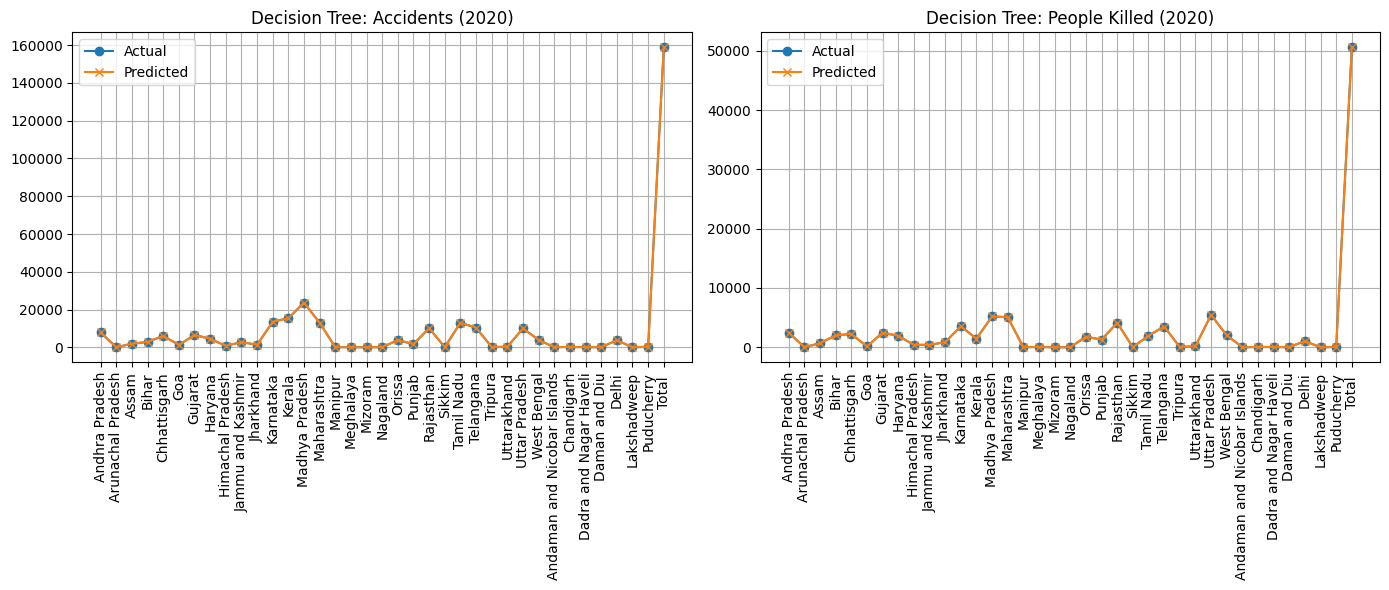

In [3]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

df = pd.read_csv("RA2020_A19 (1).csv")


df_model = df[[
    "State/UT",
    "Accidents - 2017", "Accidents - 2018", "Accidents - 2019", "Accidents - 2020 - Number",
    "Killed - 2017", "Killed - 2018", "Killed - 2019", "Killed - 2020 - Number"
]].copy()


numeric_cols = df_model.columns[1:]
df_model[numeric_cols] = df_model[numeric_cols].replace(',', '', regex=True).astype(float)


df_model[numeric_cols] = df_model[numeric_cols].interpolate(axis=1)
df_model[numeric_cols] = df_model[numeric_cols].fillna(method='ffill', axis=1).fillna(method='bfill', axis=1)


X_acc = df_model[["Accidents - 2017", "Accidents - 2018", "Accidents - 2019"]]
y_acc = df_model["Accidents - 2020 - Number"]

X_killed = df_model[["Killed - 2017", "Killed - 2018", "Killed - 2019"]]
y_killed = df_model["Killed - 2020 - Number"]


tree_acc = DecisionTreeRegressor(random_state=42)
tree_killed = DecisionTreeRegressor(random_state=42)


r2_acc_scores = cross_val_score(tree_acc, X_acc, y_acc, cv=5, scoring='r2')
rmse_acc_scores = np.sqrt(-cross_val_score(tree_acc, X_acc, y_acc, cv=5, scoring='neg_mean_squared_error'))

r2_killed_scores = cross_val_score(tree_killed, X_killed, y_killed, cv=5, scoring='r2')
rmse_killed_scores = np.sqrt(-cross_val_score(tree_killed, X_killed, y_killed, cv=5, scoring='neg_mean_squared_error'))


tree_acc.fit(X_acc, y_acc)
tree_killed.fit(X_killed, y_killed)

y_acc_pred = tree_acc.predict(X_acc)
y_killed_pred = tree_killed.predict(X_killed)


print("\n Decision Tree - Accidents:")
print(f"Mean CV R²: {r2_acc_scores.mean():.3f}")
print(f"Mean CV RMSE: {rmse_acc_scores.mean():.2f}")

print("\n Decision Tree - Killed:")
print(f"Mean CV R²: {r2_killed_scores.mean():.3f}")
print(f"Mean CV RMSE: {rmse_killed_scores.mean():.2f}")

plt.figure(figsize=(14, 6))


plt.subplot(1, 2, 1)
plt.plot(df_model["State/UT"], y_acc, marker='o', label="Actual")
plt.plot(df_model["State/UT"], y_acc_pred, marker='x', label="Predicted")
plt.xticks(rotation=90)
plt.title("Decision Tree: Accidents (2020)")
plt.legend()
plt.grid(True)


plt.subplot(1, 2, 2)
plt.plot(df_model["State/UT"], y_killed, marker='o', label="Actual")
plt.plot(df_model["State/UT"], y_killed_pred, marker='x', label="Predicted")
plt.xticks(rotation=90)
plt.title("Decision Tree: People Killed (2020)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
